### Mining the Bible 

Li Liu 

12/20/2018

@University of Chicago

1. Randomly select a verse containing keywords

2. Visualize number of verses in each book

3. Counting words and splitting text

4. Compare a verse across difference versions

5. Text Similarity Metrics: Jaccard Similarity

...More work in progress(NLP, CNN)...

In [137]:
import numpy as np
import pandas as pd 
import numpy as np 
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

import re

%matplotlib inline
pd.options.display.max_colwidth = 1000 #to print complet verses

C:\Anaconda\lib\site-packages\IPython\html.py:14: ShimWarning: The `IPython.html` package has been deprecated since IPython 4.0. You should import from `notebook` instead. `IPython.html.widgets` has moved to `ipywidgets`.
  "`IPython.html.widgets` has moved to `ipywidgets`.", ShimWarning)


In [149]:
index=pd.read_csv('bible_version_key.csv')
#Drop the columns where at least one element is missing.
index=index.dropna(axis='columns')
index

,id,table,abbreviation,language,version,info_url,copyright
0,1,t_asv,ASV,english,American Standard-ASV1901,http://en.wikipedia.org/wiki/American_Standard_Version,Public Domain
1,2,t_bbe,BBE,english,Bible in Basic English,http://en.wikipedia.org/wiki/Bible_in_Basic_English,Public Domain
2,3,t_dby,DARBY,english,Darby English Bible,http://en.wikipedia.org/wiki/Darby_Bible,Public Domain
3,4,t_kjv,KJV,english,King James Version,http://en.wikipedia.org/wiki/King_James_Version,Public Domain
4,5,t_wbt,WBT,english,Webster's Bible,http://en.wikipedia.org/wiki/Webster%27s_Revision,Public Domain
5,6,t_web,WEB,english,World English Bible,http://en.wikipedia.org/wiki/World_English_Bible,Public Domain
6,7,t_ylt,YLT,english,Young's Literal Translation,http://en.wikipedia.org/wiki/Young%27s_Literal_Translation,Public Domain


In [30]:
#American Standard-ASV1901
asv = pd.read_csv('t_asv.csv')

#Bible in Basic English
bbe = pd.read_csv('t_bbe.csv')

#Darby English Bible
dby = pd.read_csv('t_dby.csv',encoding='latin-1')

#King James Version
kjv = pd.read_csv('t_kjv.csv')

#Webster's Bible
wbt = pd.read_csv('t_wbt.csv')

#World English Bible
web = pd.read_csv('t_web.csv')

#Young's Literal Translation
ylt = pd.read_csv('t_ylt.csv')

#### Randomly select a verse containing keywords

In [36]:
#Find verses containing "LOVE". 
love=asv[asv['t'].str.contains('love',case=False)]
sel=np.random.randint(1,love.shape[0])
print("Verse Number:",love['b'].iloc[sel],love['c'].iloc[sel])
print(love['t'].iloc[sel])

Verse Number: 19 109
And they have rewarded me evil for good, And hatred for my love.


In [13]:
#Find verses containing "christ"
chri=asv[asv['t'].str.contains('christ',case=False)]
sel=np.random.randint(1,chri.shape[0])
print("Verse Number:",chri['b'].iloc[sel],chri['c'].iloc[sel])
print(chri['t'].iloc[sel])

Verse Number: 48 3
So that the law is become our tutor `to bring us' unto Christ, that we might be justified by faith.


#### Visualize number of verses in each book

<Container object of 66 artists>

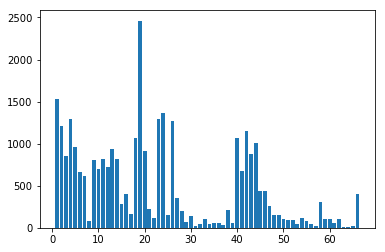

In [14]:
ct=asv.groupby(['b'])['t'].count()
plt.bar(range(1,67),ct)

#### Counting Words

In [15]:
counts = dict()
for text in asv['t']:
    tokens=text.lower().split()
    tokens=[re.sub(r'[^\w\s]','',i) for i in tokens]
    for i in tokens: 
        if i in counts:
            counts[i]+=1
        else:
            counts[i]=1
sorted_counts = sorted(counts.items(), key=lambda pair: pair[1], reverse=True)
print("10 most common words:\nWord\tCount")
for word, count in sorted_counts[:10]:
    print("{}\t{}".format(word, count))

print("\n10 least common words:\nWord\tCount")
for word, count in sorted_counts[-10:]:
    print("{}\t{}".format(word, count))

10 most common words:
Word	Count
the	59140
and	52094
of	34515
to	13771
that	13575
in	12770
he	10634
unto	9257
for	9170
shall	9105

10 least common words:
Word	Count
thyine	1
slaves	1
sumptuous	1
saileth	1
costliness	1
chalcedony	1
sardonyx	1
chrysolite	1
chrysoprase	1
transparent	1


#### Splitting text

Regular Expression package `re` to split the text into sentences, and each sentence into words (tokens)

`str.strip`: Remove leading and trailing spaces from each sentence
`re.split(r"<your regexp>", text)`:regular expression that matches sentence delimiters

`r`: preceding the regexp string - this denotes a raw string and tells Python not to interpret the characters in any special way (e.g. escape sequences like '\n' do not get converted to newlines, etc.).
 
link: https://docs.python.org/3.5/library/re.html

In [38]:
for text in asv['t']:
    sentence=list(map(str.strip, re.split(r"[.?](?!$.)", text)))[:-1]
    for sent in sentence:
        list(map(str.strip, 
                       re.split("(?:(?:[^a-zA-Z]+')|(?:'[^a-zA-Z]+))|(?:[^a-zA-Z']+)",sent)))

#### Compare a verse across difference versions

Corinthians 13:4

In [99]:
#Book index for Corinthians, Chapter and verse number
b,c,vn=46,13,4

diff=pd.DataFrame(index['version'])
ver=[asv,bbe,dby,kjv,wbt,web,ylt]
for i,v in enumerate(ver):
    diff.loc[[i],'verse'] =v[(v['b']==b) & (v['c']==c) &(v['v']==vn)]['t'].values
    
diff

,version,verse
0,American Standard-ASV1901,"Love suffereth long, `and' is kind; love envieth not; love vaunteth not itself, is not puffed up,"
1,Bible in Basic English,"Love is never tired of waiting; love is kind; love has no envy; love has no high opinion of itself, love has no pride;"
2,Darby English Bible,"Love has long patience, is kind; love is not emulous [of others]; love is not insolent and rash, is not puffed up,"
3,King James Version,"Charity suffereth long, and is kind; charity envieth not; charity vaunteth not itself, is not puffed up,"
4,Webster's Bible,"Charity suffereth long, and is kind; charity envieth not; charity vaunteth not itself, is not puffed up,"
5,World English Bible,"Love is patient and is kind; love doesn't envy. Love doesn't brag, is not proud,"
6,Young's Literal Translation,"The love is long-suffering, it is kind, the love doth not envy, the love doth not vaunt itself, is not puffed up,"


### Text Similarity Metrics 

#### Jaccard Similarity
Metric=size of intersection of the set divided by total size of set

In [126]:
def get_jaccard_sim(str1, str2): 
    a = set(str1.split()) 
    b = set(str2.split())
    c = a.intersection(b)
    return float(len(c)) / (len(a) + len(b) - len(c))

In [161]:
#Example: get certain verse without index 
asv.loc[[0],'t'].to_string(index=False)

'In the beginning God created the heavens and the earth.'

In [128]:
#Compare two verses
a=diff.loc[[0],'verse'].to_string(index=False)
b=diff.loc[[4],'verse'].to_string(index=False)
get_jaccard_sim(a,b)

0.6470588235294118

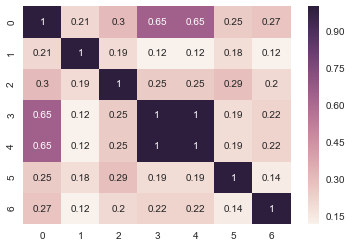

In [145]:
#Metric Matrix
jac=pd.DataFrame(index=range(7))
for it in range(7):
    jac[it]=[get_jaccard_sim(diff.loc[[it],'verse'].to_string(index=False),
                          diff.loc[[i],'verse'].to_string(index=False)) for i in range(7)]

sns.heatmap(jac, annot=True)


In [224]:
#Compare two books!
def com_book(b1,b2):
    if b1.shape[0]==b2.shape[0]:
        sim=[]
        for i in range(b1.shape[0]):
            a=b1.loc[[i],'t'].to_string(index=False)
            b=b2.loc[[i],'t'].to_string(index=False)    
            sim.append(get_jaccard_sim(a,b))
        return np.mean(sim)
    else:
        #print("Lengths differ. Something is wrong in the dataset :(")
        return np.nan

In [195]:
com_book(asv,bbe)

0.3528142296309077

In [208]:
com_book(asv,dby)

False

In [231]:
#DataFrame Setup
ver=["asv","bbe","dby","kjv","wbt","web","ylt"]
jacsim=pd.DataFrame(index=ver)
for i in ver:
    jacsim[i]=np.nan

In [229]:
#Calculate Jaccard Similarity of any of the two versions.
#Could be optimized by calculating (i,j) and (j,i) once.
ver=[asv,bbe,dby,kjv,wbt,web,ylt]
for i in range(7):
    for j in range(7):
        jacsim.iloc[i,j]=com_book(ver[i],ver[j])

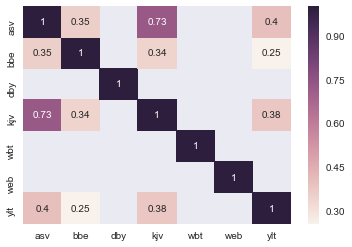

In [230]:
sns.heatmap(jacsim, annot=True)

#### Future work: discover patterns in the text using unsupervised learning and NLP